# lets parsing 

In [1]:
# Import libraries
import requests
import re # regular expressions
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import numpy as np
import unidecode
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from tqdm import tqdm
from time import sleep

In [2]:
from selenium.webdriver import Chrome
from selenium.webdriver.common. keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium. webdriver.support import expected_conditions as EC
from selenium. common.exceptions import NoSuchElementException
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains  # –ò–º–ø–æ—Ä—Ç –¥–ª—è ActionChains


In [2]:
browser=webdriver.Chrome()

In [21]:
url='https://krisha.kz/arenda/kvartiry/?rent-period-switch=%2Farenda%2Fkvartiry'

In [6]:
browser.get(url)

In [7]:
content = browser.page_source
soup = BeautifulSoup(content)
soup

<html class=""><head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>–ê—Ä–µ–Ω–¥–∞ –∫–≤–∞—Ä—Ç–∏—Ä –ø–æ–º–µ—Å—è—á–Ω–æ –≤ –ê–ª–º–∞—Ç—ã: —Å–¥–∞—Ç—å, —Å–Ω—è—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—É  ‚Äì –æ–±—ä—è–≤–ª–µ–Ω–∏—è –Ω–∞ –ö—Ä—ã—à–µ</title>
<meta content="¬´–ö—Ä—ã—à–∞¬ª ‚Äì –∫—Ä—É–ø–Ω–µ–π—à–∞—è –±–∞–∑–∞ –±–µ—Å–ø–ª–∞—Ç–Ω—ã—Ö –æ–±—ä—è–≤–ª–µ–Ω–∏–π –ø–æ ‚≠ê –ø–æ–º–µ—Å—è—á–Ω–æ–π –∞—Ä–µ–Ω–¥–µ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ ‚≠ê –≤ –ê–ª–º–∞—Ç—ã. –ó–¥–µ—Å—å –º–æ–∂–Ω–æ —Å–Ω—è—Ç—å –∏ —Å–¥–∞—Ç—å –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å –≤ –ª—é–±–æ–º –≥–æ—Ä–æ–¥–µ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω–∞. –ï–∂–µ–¥–Ω–µ–≤–Ω–æ–µ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ!" name="description"/>
<link href="https://krisha.kz/arenda/kvartiry/almaty/" hreflang="ru" rel="alternate"/>
<link href="https://krisha.kz/kz/arenda/kvartiry/almaty/" hreflang="kz" rel="alternate"/>
<link href="https://krisha.kz/arenda/kvartiry/almaty/" rel="canonical"/>
<link href="https://m.krisha.kz/arend

In [24]:
main=browser.find_element(By.CLASS_NAME,"a-card__header-left")
main.text

'2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 54.5 –º¬≤, 10/12 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ'

In [25]:
price=browser.find_element(By.CLASS_NAME,"a-card__price")
price.text

'290 000 „Äí'

In [26]:
loca=browser.find_element(By.CLASS_NAME,"a-card__subtitle")
loca.text

'–ö–∞—Ä–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ù—É—Ä—Å–∞—Ç, –ù–∞–∑–∞—Ä–±–µ–∫–æ–≤–∞ 29/2 ‚Äî –®–∞—è—Ö–º–µ—Ç–æ–≤'

In [27]:
inf=browser.find_element(By.CLASS_NAME,"a-card__text-preview")
inf.text

'–∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Otau city, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥–∞—ë–º –∫–≤–∞—Ä—Ç–∏—Ä—É —á–∏—Å—Ç—É—é —Å–æ –≤—Å–µ–º–∏ —É–¥–æ–±—Å—Ç–≤–∞–º–∏ –∑–≤–æ–Ω–∏—Ç—å –¥–æ 22.00 –µ—Å—Ç—å –¥–µ–ø–æ–∑–∏—Ç'

In [28]:
browser.find_element(By.CLASS_NAME,'paginator__btn').click()

In [12]:
def clickNextPageButton():
    rightButton = browser.find_element(By.CLASS_NAME, 'paginator__btn-text')
    if rightButton == None:
        return
    ActionChains(browser).click(rightButton).perform()

In [13]:
content_before = browser.page_source
clickNextPageButton()
content_after = browser.page_source

if content_before != content_after:
    print("–ü–µ—Ä–µ—à–µ–ª –Ω–∞ —Å–ª–µ–¥—É—é—â—É—é —Å—Ç—Ä–∞–Ω–∏—Ü—É")
else:
    print("–û—Å—Ç–∞–ª—Å—è –Ω–∞ —Ç–æ–π –∂–µ —Å—Ç—Ä–∞–Ω–∏—Ü–µ")


–ü–µ—Ä–µ—à–µ–ª –Ω–∞ —Å–ª–µ–¥—É—é—â—É—é —Å—Ç—Ä–∞–Ω–∏—Ü—É


In [37]:
len(browser.find_elements(By.CLASS_NAME, 'a-card__header'))

20

In [51]:
for item in data[:5]:  
    print(item)

['3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 70 –º¬≤, 5/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ', '430 000 „Äí', '–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ù–∞–∑–∞—Ä–±–∞–µ–≤–∞ 189/1 ‚Äî –°–∞—Ç–ø–∞–µ–≤–∞', '–º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥–∞–µ—Ç—Å—è 3-—Ö –∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤ —Å–∞–º–æ–º —Ü–µ–Ω—Ç—Ä–µ –≥–æ—Ä–æ–¥–∞! –ö–≤–∞—Ä—Ç–∏—Ä–∞ –æ—Å–Ω–∞—â–µ–Ω–∞ –≤—Å–µ–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–π –º–µ–±–µ–ª—å—é –∏ —Ç–µ—Ö–Ω–∏–∫–æ–π –¥–ª—è –∫–æ–º—Ñ–æ—Ä—Ç–Ω–æ–≥–æ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è. –ö–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä—ã —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã –≤ –≥–æ—Å—Ç–∏–Ω–æ–π –∏ –º–∞—Å—Ç–µ—Ä —Å–ø–∞–ª—å–Ω–µ, –≤ –¥–µ—Ç—Å–∫–æ–π —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –¥–∏–≤–∞–Ω –∏ —Ä–∞–±–æ—á–∏–π —Å—Ç–æ–ª. –ë–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–µ—Å—Ç –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è. –û—Ç–ª–∏—á‚Ä¶']
['2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 50 –º¬≤, 2/3 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ', '450 000 „Äí', '–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ñ–∞–º–±—ã–ª–∞ 59 ‚Äî –ê–±—ã–ª–∞–π —Ö–∞–Ω–∞', '–º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é']
['2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä

In [14]:
import re
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
def clean_text(text):
    return text.strip().replace('\n', '').replace('\xa0', ' ').strip()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —á–∏—Å–ª–æ–≤–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Å—Ç—Ä–æ–∫–∏ —Ü–µ–Ω—ã
def extract_price(price_text):
    match = re.search(r'\d+', price_text.replace(' ', ''))
    return int(match.group()) if match else None

df = pd.DataFrame(columns=['main', 'price', 'Price', 'Location', 'Issue Date'])
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –±—Ä–∞—É–∑–µ—Ä–∞
browser = webdriver.Chrome()
url = 'https://krisha.kz/arenda/kvartiry/almaty/'
browser.get(url)

sleep(3)

# –¶–∏–∫–ª –ø–æ —Å—Ç—Ä–∞–Ω–∏—Ü–∞–º
for p in range(3):
    soup = BeautifulSoup(browser.page_source, 'lxml')
    orgs = soup.findAll('div', class_='a-card__header')

    # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –∫–∞–∂–¥—ã–π –±–ª–æ–∫ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏
    for org in orgs:
        main = clean_text(org.find("div", class_="a-card__header-left").text) 
        price = clean_text(org.find("div", class_="a-card__price").text)
        price_num = extract_price(price)  # –ò–∑–≤–ª–µ–∫–∞–µ–º —á–∏—Å–ª–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ü–µ–Ω—ã
        loca = clean_text(org.find("div", class_="a-card__subtitle").text)
        inf = clean_text(org.find('div', class_="a-card__text-preview").text)

        # –î–æ–±–∞–≤–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Å–ø–∏—Å–æ–∫
        data.append([main, price, price_num, loca, inf])
    
    print(f"Page {p+1}: {len(data)} entries scraped.")
    clickNextPageButton()
    sleep(3)

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print(f"Total data collected: {len(data)}")


Page 1: 23 entries scraped.
Page 2: 43 entries scraped.
Page 3: 63 entries scraped.
Total data collected: 63


In [22]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import re

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—É—Å—Ç–æ–π DataFrame —Å –Ω—É–∂–Ω—ã–º–∏ –∫–æ–ª–æ–Ω–∫–∞–º–∏
df = pd.DataFrame(columns=['main', 'price', 'loca', 'inf'])

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
def clean_text(text):
    return text.strip().replace('\n', '').replace('\xa0', ' ').strip()

# –ó–∞–ø—É—Å–∫–∞–µ–º –±—Ä–∞—É–∑–µ—Ä –∏ –ø–µ—Ä–µ—Ö–æ–¥–∏–º –Ω–∞ —Å–∞–π—Ç
browser = webdriver.Chrome()
url = 'https://krisha.kz/arenda/kvartiry/almaty/'
browser.get(url)
sleep(3)

# –¶–∏–∫–ª –ø–æ —Å—Ç—Ä–∞–Ω–∏—Ü–∞–º
for p in range(300):
    soup = BeautifulSoup(browser.page_source, 'lxml')
    orgs = soup.findAll('div', class_='a-card__header')
    
    # –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö —Ç–µ–∫—É—â–µ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã
    page_data = []
    
    # –°–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑ –∫–∞—Ä—Ç–æ—á–µ–∫
    for org in orgs:
        main = clean_text(org.find("div", class_="a-card__header-left").text)
        price = clean_text(org.find("div", class_="a-card__price").text)
        loca = clean_text(org.find("div", class_="a-card__subtitle").text)
        inf = clean_text(org.find('div', class_="a-card__text-preview").text)
        
        # –ò–∑–≤–ª–µ–∫–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–∞ –∏–∑ —Ü–µ–Ω—ã –∏ –¥–æ–±–∞–≤–ª—è–µ–º –∫ –¥–∞–Ω–Ω—ã–º
        price_numeric = re.findall(r'\d+', price.replace(' ', ''))  # —É–±–∏—Ä–∞–µ–º –ø—Ä–æ–±–µ–ª—ã –∏ –∏–∑–≤–ª–µ–∫–∞–µ–º —Ç–æ–ª—å–∫–æ —Ü–∏—Ñ—Ä—ã
        price_numeric = int("".join(price_numeric)) if price_numeric else None
        
        # –î–æ–±–∞–≤–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Å–ø–∏—Å–æ–∫
        page_data.append([main, price_numeric, loca, inf])
    
    # –°–æ–∑–¥–∞–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–π DataFrame –¥–ª—è —Ç–µ–∫—É—â–µ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã –∏ –¥–æ–±–∞–≤–ª—è–µ–º –≤ –æ—Å–Ω–æ–≤–Ω–æ–π df
    temp_df = pd.DataFrame(page_data, columns=['main', 'price', 'loca', 'inf'])
    df = pd.concat([df, temp_df], ignore_index=True)
    
    print(f"–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: {len(df)} –∑–∞–ø–∏—Å–µ–π")

    # –ü–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å–ª–µ–¥—É—é—â—É—é —Å—Ç—Ä–∞–Ω–∏—Ü—É
    # –î–æ–ª–∂–Ω–∞ –±—ã—Ç—å —Ñ—É–Ω–∫—Ü–∏—è –∏–ª–∏ –¥–µ–π—Å—Ç–≤–∏–µ –¥–ª—è –Ω–∞–∂–∞—Ç–∏—è –∫–Ω–æ–ø–∫–∏ "–°–ª–µ–¥—É—é—â–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞"
    # clickNextPageButton()  # —Ä–∞—Å–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ, –µ—Å–ª–∏ —Ñ—É–Ω–∫—Ü–∏—è —É–∂–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞
    clickNextPageButton()
    sleep(10)
    
# –ü—Ä–æ—Å–º–æ—Ç—Ä —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ DataFrame
print(df.head())


–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 23 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 43 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 63 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 83 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 103 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 123 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 143 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 163 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 183 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 203 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 223 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 243 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 263 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 283 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 303 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 323 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 343 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 363 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 383 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 403 –∑–∞–ø–∏—Å–µ–π
–°–æ–±—Ä–∞–Ω–æ –¥–∞–Ω–Ω—ã—Ö: 423 –∑–∞–ø–∏—Å–

TimeoutException: Message: timeout: Timed out receiving message from renderer: 300.000
  (Session info: chrome=130.0.6723.117)
Stacktrace:
	GetHandleVerifier [0x00007FF77AE738A5+3004357]
	(No symbol) [0x00007FF77AB09970]
	(No symbol) [0x00007FF77A9B582A]
	(No symbol) [0x00007FF77A9A3C07]
	(No symbol) [0x00007FF77A9A390A]
	(No symbol) [0x00007FF77A9A153E]
	(No symbol) [0x00007FF77A9A1FEF]
	(No symbol) [0x00007FF77A9B08EE]
	(No symbol) [0x00007FF77A9C38AD]
	(No symbol) [0x00007FF77A9C922A]
	(No symbol) [0x00007FF77A9A2754]
	(No symbol) [0x00007FF77A9C3691]
	(No symbol) [0x00007FF77AA4B92E]
	(No symbol) [0x00007FF77AA2B983]
	(No symbol) [0x00007FF77A9F7628]
	(No symbol) [0x00007FF77A9F8791]
	GetHandleVerifier [0x00007FF77AE9A00D+3161901]
	GetHandleVerifier [0x00007FF77AEEE060+3506048]
	GetHandleVerifier [0x00007FF77AEE400D+3465005]
	GetHandleVerifier [0x00007FF77AC60EEB+830987]
	(No symbol) [0x00007FF77AB1467F]
	(No symbol) [0x00007FF77AB109D4]
	(No symbol) [0x00007FF77AB10B6D]
	(No symbol) [0x00007FF77AB00149]
	BaseThreadInitThunk [0x00007FFC9FF57374+20]
	RtlUserThreadStart [0x00007FFCA193CC91+33]


In [25]:
df.to_excel("krishap.xlsx", index=False)

# load data

In [3]:
df=pd.read_excel("C:\\Users\\Asus\\Downloads\\krishap.xlsx")
df

main   price  \
0       1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 48 –º¬≤, 3/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  200000   
1       3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 68 –º¬≤, 5/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  300000   
2       1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 38 –º¬≤, 3/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  250000   
3       2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 43 –º¬≤, 2/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  300000   
4       2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 56 –º¬≤, 3/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   
...                                                 ...     ...   
3758    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 53 –º¬≤, 1/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  330000   
3759    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤, 4/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  210000   
3760    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 60 –º¬≤, 7/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   
3761    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 42 –º¬≤, 4/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  230000   
3762  2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 47.4 –º¬≤, 4/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   

                                                   loca  \
0                  –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω, –°–µ–≤–µ—Ä–Ω–æ–µ –ö–æ–ª—å—Ü–æ 93/2   
1                        –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –†–∞–π—ã–º–±–µ–∫–∞ 82/90   
2           –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –ø—Ä–æ—Å–ø–µ–∫—Ç –ê–±–∞—è 27 ‚Äî –¢—É–ª–µ–±–∞–µ–≤–∞   
3                     –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ñ–∞—Ä–æ–∫–æ–≤–∞ –ê–±–∞—è 96   
4      –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –†–æ–∑—ã–±–∞–∫–∏–µ–≤–∞ 70 ‚Äî –ö–∞—Ä–∞—Å–∞–π –±–∞—Ç—ã—Ä–∞   
...                                                 ...   
3758                       –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä ‚Ññ12 22/2   
3759                     –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ê–∫—Å–∞–π-4 54   
3760  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –®—É–≥—ã–ª–∞, –ú–∫—Ä. –®—É–≥—ã–ª–∞ 340...   
3761         –ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ó–µ—Ä–¥–µ–ª–∏ (–ê–ª–≥–∞–±–∞—Å-6) 59   
3762  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –û—Ä–±–∏—Ç–∞-4 32 ‚Äî –ê–ª—å-–§–∞—Ä–∞–±...   

                                                    inf  
0     –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å O-JET, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥...  
1     –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –†—è–¥–æ–º –∑–µ–ª—ë–Ω—ã–π –±–∞–∑–∞—Ä, —Å–∞...  
2     –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç –≤ —Ä–∞–∑–º–µ—Ä–µ 100 0...  
3     –ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ—Ç–ª–∏—á–Ω–æ–µ (–ê–±–∞—è/–ñ–∞—Ä–æ–∫–æ–≤–∞), –≤—Å–µ –≤...  
4       –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç, —Ö–æ—Ä–æ—à–∞—è –ª–æ–∫–∞—Ü–∏—è  
...                                                 ...  
3758  –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥–∞–º –∫–≤–∞—Ä—Ç–∏—Ä—É, –ø–æ—Å–ª–µ —Ä–µ...  
3759  –±–µ–∑ –º–µ–±–µ–ª–∏, –°–¥–∞–µ—Ç—Å—è –æ–¥–Ω–æ–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –ø–æ—Å...  
3760  –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –ß–∏—Å—Ç–∞—è, —Å–≤–µ—Ç–ª–∞—è –∫–≤–∞—Ä—Ç–∏—Ä...  
3761                               –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ —á–∞—Å—Ç–∏—á–Ω–æ  
3762            –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç 100000—Ç–≥  

[3763 rows x 4 columns]

# .Data Preprocessing:

In [5]:
# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö NaN
rows_with_nan = df[df.isnull().any(axis=1)]
print(rows_with_nan)


                                                   main   price  \
82      2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 70 –º¬≤, 4/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  230000   
475     2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 52 –º¬≤, 2/2 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  190000   
1037    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 69 –º¬≤, 3/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  220000   
1121    3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 75 –º¬≤, 4/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  270000   
1157    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 42 –º¬≤, 4/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  200000   
1233    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤, 3/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  240000   
1247    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 56 –º¬≤, 2/3 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  200000   
1260    3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 68 –º¬≤, 5/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  370000   
1280    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤, 4/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  250000   
1371    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—

In [4]:
import pandas as pd
import re

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —á–∏—Å–µ–ª –∏–∑ —Å—Ç—Ä–æ–∫–∏
def extract_numbers(text):
    # –†–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —á–∏—Å–µ–ª
    numbers = re.findall(r'\d+\.?\d*', text)  # –∑–∞—Ö–≤–∞—Ç —á–∏—Å–µ–ª —Å –≤–æ–∑–º–æ–∂–Ω—ã–º–∏ –¥–µ—Å—è—Ç–∏—á–Ω—ã–º–∏ —Ç–æ—á–∫–∞–º–∏
    
    # –ï—Å–ª–∏ –Ω–∞–π–¥–µ–Ω–æ –º–µ–Ω—å—à–µ 4 —á–∏—Å–µ–ª, –¥–æ–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ NaN
    while len(numbers) < 4:
        numbers.append(None)
    
    return numbers

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∏ —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
numbers_df = pd.DataFrame(df['main'].apply(extract_numbers).to_list(), index=df.index)

# –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º —Å—Ç–æ–ª–±—Ü—ã
df[['rooms', 'area', 'floor', 'total_floors']] = numbers_df

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±—Ü—ã –≤ –Ω—É–∂–Ω—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö
df['rooms'] = df['rooms'].astype(int)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 'area' –≤ float, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —á–∏—Å–ª–∞ —Å –ø–ª–∞–≤–∞—é—â–µ–π —Ç–æ—á–∫–æ–π
df['area'] = df['area'].astype(float)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 'floor' –∏ 'total_floors', –∑–∞–º–µ–Ω—è—è None –Ω–∞ 0, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
df['floor'] = df['floor'].fillna(0).astype(int)
df['total_floors'] = df['total_floors'].fillna(0).astype(int)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 'area' –≤ —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ, –µ—Å–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ
df['area'] = df['area'].round().astype(int)

# –†–µ–∑—É–ª—å—Ç–∞—Ç
df


main   price  \
0       1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 48 –º¬≤, 3/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  200000   
1       3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 68 –º¬≤, 5/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  300000   
2       1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 38 –º¬≤, 3/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  250000   
3       2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 43 –º¬≤, 2/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  300000   
4       2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 56 –º¬≤, 3/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   
...                                                 ...     ...   
3758    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 53 –º¬≤, 1/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  330000   
3759    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤, 4/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  210000   
3760    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 60 –º¬≤, 7/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   
3761    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 42 –º¬≤, 4/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  230000   
3762  2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 47.4 –º¬≤, 4/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   

                                                   loca  \
0                  –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω, –°–µ–≤–µ—Ä–Ω–æ–µ –ö–æ–ª—å—Ü–æ 93/2   
1                        –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –†–∞–π—ã–º–±–µ–∫–∞ 82/90   
2           –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –ø—Ä–æ—Å–ø–µ–∫—Ç –ê–±–∞—è 27 ‚Äî –¢—É–ª–µ–±–∞–µ–≤–∞   
3                     –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ñ–∞—Ä–æ–∫–æ–≤–∞ –ê–±–∞—è 96   
4      –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –†–æ–∑—ã–±–∞–∫–∏–µ–≤–∞ 70 ‚Äî –ö–∞—Ä–∞—Å–∞–π –±–∞—Ç—ã—Ä–∞   
...                                                 ...   
3758                       –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä ‚Ññ12 22/2   
3759                     –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ê–∫—Å–∞–π-4 54   
3760  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –®—É–≥—ã–ª–∞, –ú–∫—Ä. –®—É–≥—ã–ª–∞ 340...   
3761         –ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ó–µ—Ä–¥–µ–ª–∏ (–ê–ª–≥–∞–±–∞—Å-6) 59   
3762  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –û—Ä–±–∏—Ç–∞-4 32 ‚Äî –ê–ª—å-–§–∞—Ä–∞–±...   

                                                    inf  rooms  area  floor  \
0     –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å O-JET, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥...      1    48      3   
1     –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –†—è–¥–æ–º –∑–µ–ª—ë–Ω—ã–π –±–∞–∑–∞—Ä, —Å–∞...      3    68      5   
2     –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç –≤ —Ä–∞–∑–º–µ—Ä–µ 100 0...      1    38      3   
3     –ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ—Ç–ª–∏—á–Ω–æ–µ (–ê–±–∞—è/–ñ–∞—Ä–æ–∫–æ–≤–∞), –≤—Å–µ –≤...      2    43      2   
4       –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç, —Ö–æ—Ä–æ—à–∞—è –ª–æ–∫–∞—Ü–∏—è      2    56      3   
...                                                 ...    ...   ...    ...   
3758  –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥–∞–º –∫–≤–∞—Ä—Ç–∏—Ä—É, –ø–æ—Å–ª–µ —Ä–µ...      2    53      1   
3759  –±–µ–∑ –º–µ–±–µ–ª–∏, –°–¥–∞–µ—Ç—Å—è –æ–¥–Ω–æ–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –ø–æ—Å...      1    40      4   
3760  –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –ß–∏—Å—Ç–∞—è, —Å–≤–µ—Ç–ª–∞—è –∫–≤–∞—Ä—Ç–∏—Ä...      2    60      7   
3761                               –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ —á–∞—Å—Ç–∏—á–Ω–æ      1    42      4   
3762            –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç 100000—Ç–≥      2    47      4   

      total_floors  
0                9  
1                5  
2                4  
3                4  
4                5  
...            ...  
3758             9  
3759             9  
3760             9  
3761             5  
3762             5  

[3763 rows x 8 columns]

In [7]:
# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫, –≥–¥–µ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–≤–Ω–æ 0
rows_with_zero = df[(df == 0).any(axis=1)]
rows_with_zero


main    price  \
23    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤, 12 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ   300000   
26             2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤ –ø–æ–º–µ—Å—è—á–Ω–æ   300000   
27             2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 51 –º¬≤ –ø–æ–º–µ—Å—è—á–Ω–æ   400000   
43    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤, 12 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ   300000   
46             2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤ –ø–æ–º–µ—Å—è—á–Ω–æ   300000   
...                                              ...      ...   
3678   3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 65 –º¬≤, 3 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ   500000   
3680   2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 45 –º¬≤, 1 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ   260000   
3715           2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 54 –º¬≤ –ø–æ–º–µ—Å—è—á–Ω–æ   250000   
3728          3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 150 –º¬≤ –ø–æ–º–µ—Å—è—á–Ω–æ  1500000   
3738          3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 105 –º¬≤ –ø–æ–º–µ—Å—è—á–Ω–æ  1000000   

                                                 loca  \
23                      –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –£—Ç–µ–ø–æ–≤–∞ 31   
26                         –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –¢–ª–µ–Ω–¥–∏–µ–≤–∞   
27       –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –°–∞–π—Ä–∞–Ω, –£—Ç–µ–≥–µ–Ω –±–∞—Ç—ã—Ä–∞ 11   
43                      –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –£—Ç–µ–ø–æ–≤–∞ 31   
46                         –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –¢–ª–µ–Ω–¥–∏–µ–≤–∞   
...                                               ...   
3678                          –ö–∞–∑—ã–±–µ–∫ –¢–∞—É–∞—Å–∞—Ä—É–ª—ã 70/6   
3680                     –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –¢–æ–∫–º–æ–∫—Å–∫–∞—è 27   
3715                   –ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –¢–µ—Ä–µ–∫—Ç—ã 34   
3728                –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ú–∫—Ä ¬´–ú–∏—Ä–∞—Å¬ª 31   
3738  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏ 41/6 ‚Äî –°–µ–π—Ñ—É–ª–ª–∏–Ω–∞   

                                                    inf  rooms  area  floor  \
23    –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Rams city, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é...      1    40     12   
26    –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –í–Ω–∏–º–∞–Ω–∏–µ: –¥–µ–ø–æ–∑–∏—Ç 150 —Ç...      2    40      0   
27    –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Everest, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, ...      2    51      0   
43    –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Rams city, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é...      1    40     12   
46    –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –í–Ω–∏–º–∞–Ω–∏–µ: –¥–µ–ø–æ–∑–∏—Ç 150 —Ç...      2    40      0   
...                                                 ...    ...   ...    ...   
3678  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å 4Hills, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –ö...      3    65      3   
3680  –ö–≤–∞—Ä—Ç–∏—Ä–∞ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞. –ù–∞ —Ñ–∫—Ä–º–∞–Ω–æ–≤–∞ –¢–∞—à–∫–µ–Ω—Å–∫–æ–π....      2    45      1   
3715  –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥–∞–µ–º 2 –∫–æ–º–Ω–∞—Ç–Ω—É—é –∫–≤–∞—Ä—Ç...      2    54      0   
3728  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Miras Park, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å...      3   150      0   
3738  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å METROPOLE, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é...      3   105      0   

      total_floors  
23               0  
26               0  
27               0  
43               0  
46               0  
...            ...  
3678             0  
3680             0  
3715             0  
3728             0  
3738             0  

[254 rows x 8 columns]

In [5]:
# –ò–∑–≤–ª–µ—á–µ–º —Ä–∞–π–æ–Ω –∏–∑ –∫–æ–ª–æ–Ω–∫–∏ 'loca'
df['district'] = df['loca'].str.extract(r'([–ê-–Ø–∞-—è—ë–Å]+ —Ä-–Ω)')

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ä–∞–π–æ–Ω –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π —Ç–∏–ø
df['district'] = df['district'].astype('category')

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(df[['loca', 'district']].head())


                                               loca         district
0              –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω, –°–µ–≤–µ—Ä–Ω–æ–µ –ö–æ–ª—å—Ü–æ 93/2   –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω
1                    –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –†–∞–π—ã–º–±–µ–∫–∞ 82/90    –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω
2       –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –ø—Ä–æ—Å–ø–µ–∫—Ç –ê–±–∞—è 27 ‚Äî –¢—É–ª–µ–±–∞–µ–≤–∞    –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω
3                 –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ñ–∞—Ä–æ–∫–æ–≤–∞ –ê–±–∞—è 96  –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω
4  –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –†–æ–∑—ã–±–∞–∫–∏–µ–≤–∞ 70 ‚Äî –ö–∞—Ä–∞—Å–∞–π –±–∞—Ç—ã—Ä–∞  –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω


In [16]:
(df == 0).sum()

main              0
price             0
loca              0
inf               0
rooms             0
area              0
floor           144
total_floors    254
dtype: int64

In [10]:
df['district'].unique()

['–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω', '–ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω', '–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω', '–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω', '–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω', '–ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω', '–ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω', '–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π —Ä-–Ω', NaN]
Categories (8, object): ['–ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω', '–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω', '–ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω', '–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω', '–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω', '–ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω', '–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω', '–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π —Ä-–Ω']

Null values

In [7]:
df['district'].isnull().sum()


138

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
df1= df.copy()

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['floor_minmax', 'total_floors_minmax']] = min_max_scaler.fit_transform(df[['floor', 'total_floors']])
df

main   price  \
0       1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 48 –º¬≤, 3/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  200000   
1       3-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 68 –º¬≤, 5/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  300000   
2       1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 38 –º¬≤, 3/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  250000   
3       2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 43 –º¬≤, 2/4 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  300000   
4       2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 56 –º¬≤, 3/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   
...                                                 ...     ...   
3758    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 53 –º¬≤, 1/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  330000   
3759    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 40 –º¬≤, 4/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  210000   
3760    2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 60 –º¬≤, 7/9 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   
3761    1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 42 –º¬≤, 4/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  230000   
3762  2-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 47.4 –º¬≤, 4/5 —ç—Ç–∞–∂ –ø–æ–º–µ—Å—è—á–Ω–æ  280000   

                                                   loca  \
0                  –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω, –°–µ–≤–µ—Ä–Ω–æ–µ –ö–æ–ª—å—Ü–æ 93/2   
1                        –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –†–∞–π—ã–º–±–µ–∫–∞ 82/90   
2           –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –ø—Ä–æ—Å–ø–µ–∫—Ç –ê–±–∞—è 27 ‚Äî –¢—É–ª–µ–±–∞–µ–≤–∞   
3                     –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ñ–∞—Ä–æ–∫–æ–≤–∞ –ê–±–∞—è 96   
4      –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –†–æ–∑—ã–±–∞–∫–∏–µ–≤–∞ 70 ‚Äî –ö–∞—Ä–∞—Å–∞–π –±–∞—Ç—ã—Ä–∞   
...                                                 ...   
3758                       –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä ‚Ññ12 22/2   
3759                     –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ê–∫—Å–∞–π-4 54   
3760  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –®—É–≥—ã–ª–∞, –ú–∫—Ä. –®—É–≥—ã–ª–∞ 340...   
3761         –ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ó–µ—Ä–¥–µ–ª–∏ (–ê–ª–≥–∞–±–∞—Å-6) 59   
3762  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –û—Ä–±–∏—Ç–∞-4 32 ‚Äî –ê–ª—å-–§–∞—Ä–∞–±...   

                                                    inf  rooms  area  floor  \
0     –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å O-JET, –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥...      1    48      3   
1     –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –†—è–¥–æ–º –∑–µ–ª—ë–Ω—ã–π –±–∞–∑–∞—Ä, —Å–∞...      3    68      5   
2     –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç –≤ —Ä–∞–∑–º–µ—Ä–µ 100 0...      1    38      3   
3     –ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ—Ç–ª–∏—á–Ω–æ–µ (–ê–±–∞—è/–ñ–∞—Ä–æ–∫–æ–≤–∞), –≤—Å–µ –≤...      2    43      2   
4       –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç, —Ö–æ—Ä–æ—à–∞—è –ª–æ–∫–∞—Ü–∏—è      2    56      3   
...                                                 ...    ...   ...    ...   
3758  –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –°–¥–∞–º –∫–≤–∞—Ä—Ç–∏—Ä—É, –ø–æ—Å–ª–µ —Ä–µ...      2    53      1   
3759  –±–µ–∑ –º–µ–±–µ–ª–∏, –°–¥–∞–µ—Ç—Å—è –æ–¥–Ω–æ–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –ø–æ—Å...      1    40      4   
3760  –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –ß–∏—Å—Ç–∞—è, —Å–≤–µ—Ç–ª–∞—è –∫–≤–∞—Ä—Ç–∏—Ä...      2    60      7   
3761                               –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ —á–∞—Å—Ç–∏—á–Ω–æ      1    42      4   
3762            –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é, –î–µ–ø–æ–∑–∏—Ç 100000—Ç–≥      2    47      4   

      total_floors           district  floor_minmax  total_floors_minmax  
0                9     –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω      0.083333             0.243243  
1                5      –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω      0.138889             0.135135  
2                4      –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω      0.083333             0.108108  
3                4    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω      0.055556             0.108108  
4                5    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω      0.083333             0.135135  
...            ...                ...           ...                  ...  
3758             9     –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω    

In [7]:
price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])
print(price_range_by_district)
    

                      min      max
district                          
–ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω      50000  2000000
–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω     82000  3600000
–ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω      85000  1500000
–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω  100000  3500000
–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω      70000   530000
–ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω       80000  5000000
–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω   60000   900000
–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π —Ä-–Ω     75000   600000


C:\Users\Asus\AppData\Local\Temp\ipykernel_19728\2354307647.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])


In [6]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ —Ä–∞–π–æ–Ω—É –∏ –≤—ã—á–∏—Å–ª—è–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é —Ü–µ–Ω—É
price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])

# –í—ã—á–∏—Å–ª—è–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω —Ü–µ–Ω –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–∞–π–æ–Ω–∞ (–º–∞–∫—Å - –º–∏–Ω) –∏ –¥–æ–±–∞–≤–ª—è–µ–º –∫–∞–∫ –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü
price_range_by_district['price_range'] = price_range_by_district['max'] - price_range_by_district['min']

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –¥–∏–∞–ø–∞–∑–æ–Ω—É —Ü–µ–Ω –≤ –ø–æ—Ä—è–¥–∫–µ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—è
price_range_by_district = price_range_by_district.sort_values(by='price_range')

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(price_range_by_district)


                      min      max  price_range
district                                       
–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω      70000   530000       460000
–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π —Ä-–Ω     75000   600000       525000
–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω   60000   900000       840000
–ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω      85000  1500000      1415000
–ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω      50000  2000000      1950000
–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω  100000  3500000      3400000
–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω     82000  3600000      3518000
–ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω       80000  5000000      4920000


C:\Users\Asus\AppData\Local\Temp\ipykernel_10740\3074681102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])


In [7]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–∏—Å–≤–æ–µ–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ä–∞–π–æ–Ω—É
def get_district_numeric(district):
    if district == "–ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω":
        return 10
    elif district == "–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω":
        return 9
    elif district == "–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω":
        return 8
    elif district == "–ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω":
        return 7
    elif district == "–ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω":
        return 6
    elif district == "–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω":
        return 5
    elif district == "–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π —Ä-–Ω":
        return 4
    elif district == "–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω":
        return 3
    else:
        return 0  # –ù–∞ —Å–ª—É—á–∞–π, –µ—Å–ª–∏ —Ä–∞–π–æ–Ω –Ω–µ —É–∫–∞–∑–∞–Ω

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫ —Å—Ç–æ–ª–±—Ü—É district –∏ —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü district_numeric
df['district_numeric'] = df['district'].apply(get_district_numeric)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(df[['district', 'district_numeric']].drop_duplicates())


             district district_numeric
0      –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω                3
1       –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω               10
3     –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω                9
6   –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω                5
7   –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω                8
16     –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω                6
18     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω                7
31    –¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π —Ä-–Ω                4
68                NaN              NaN


In [8]:
mode_d=df['district_numeric'].mode()[0]
df['district_numeric']=df['district_numeric'].fillna(mode_d)
df.isnull().sum()

main                     0
price                    0
loca                     0
inf                     35
rooms                    0
area                     0
floor                    0
total_floors             0
district               138
floor_minmax             0
total_floors_minmax      0
district_numeric         0
dtype: int64

In [10]:
df.describe()

price        rooms         area        floor  total_floors  \
count  3.763000e+03  3763.000000  3763.000000  3763.000000   3763.000000   
mean   4.047633e+05     2.021260    65.302153     5.170874      8.786075   
std    3.338155e+05     0.920598    43.756617     4.334840      5.880133   
min    5.000000e+04     1.000000    11.000000     0.000000      0.000000   
25%    2.400000e+05     1.000000    42.000000     2.000000      5.000000   
50%    3.100000e+05     2.000000    55.000000     4.000000      9.000000   
75%    4.500000e+05     3.000000    73.000000     7.000000     12.000000   
max    5.000000e+06     8.000000   600.000000    36.000000     37.000000   

       floor_minmax  total_floors_minmax  
count   3763.000000          3763.000000  
mean       0.143635             0.237461  
std        0.120412             0.158923  
min        0.000000             0.000000  
25%        0.055556             0.135135  
50%        0.111111             0.243243  
75%        0.194444             0.324324  
max        1.000000             1.000000

In [32]:
len(df[df['price']<=0])

0

In [36]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# –ì—Ä–∞–Ω–∏—Ü—ã –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('q1',Q1 ,Q3 ,IQR,'\n' ,lower_bound , '\n' , upper_bound)

q1 240000.0 450000.0 210000.0 
 -75000.0 
 765000.0


In [45]:
df_filter=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [46]:
len(df_filte)

3455

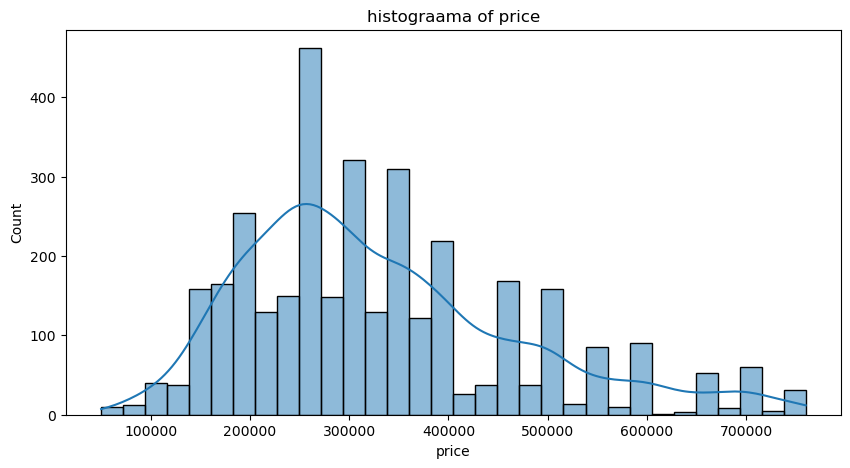

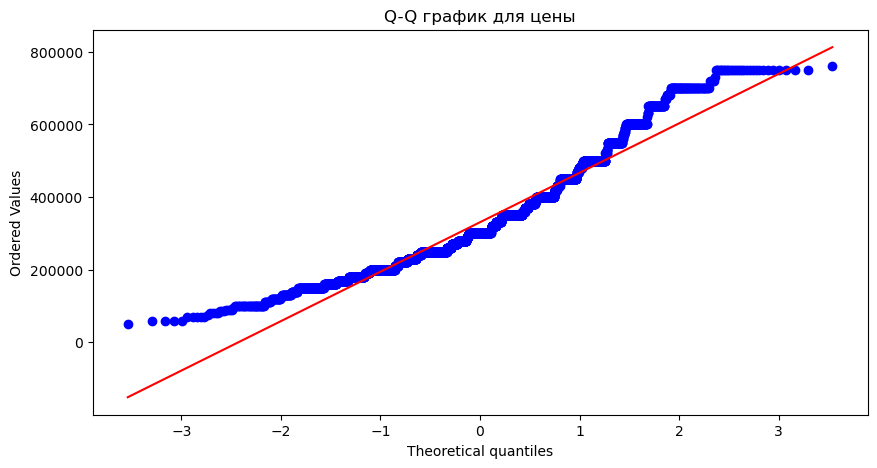

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
plt.figure(figsize=(10, 5))
sns.histplot(df_filter['price'], kde=True)
plt.title("histograama of price")
plt.show()

# Q-Q –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(10, 5))
stats.probplot(df_filter['price'], dist="norm", plot=plt)
plt.title("Q-Q –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Ü–µ–Ω—ã")
plt.show()

In [48]:
df_filter.describe()

price        rooms         area        floor  total_floors  \
count    3455.000000  3455.000000  3455.000000  3455.000000   3455.000000   
mean   330708.083647     1.885094    57.094356     4.940955      8.509407   
std    140106.732657     0.764246    23.985539     4.015890      5.538397   
min     50000.000000     1.000000    11.000000     0.000000      0.000000   
25%    230000.000000     1.000000    42.000000     2.000000      5.000000   
50%    300000.000000     2.000000    52.000000     4.000000      9.000000   
75%    400000.000000     2.000000    68.000000     7.000000     12.000000   
max    760000.000000     5.000000   220.000000    29.000000     33.000000   

       floor_minmax  total_floors_minmax    log_price  
count   3455.000000          3455.000000  3455.000000  
mean       0.137249             0.229984    12.620342  
std        0.111553             0.149686     0.427875  
min        0.000000             0.000000    10.819798  
25%        0.055556             0.135135    12.345839  
50%        0.111111             0.243243    12.611541  
75%        0.194444             0.324324    12.899222  
max        0.805556             0.891892    13.541075

#  Split the Data:


In [61]:
X = df_filter.drop(columns=['main','price','loca','inf','district','floor','total_floors','log_price','rooms'])
Y = df_filter['price']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, )

In [63]:
X_train

area  floor_minmax  total_floors_minmax district_numeric
2468    64      0.111111             0.270270                6
2307    46      0.111111             0.108108                6
1378    43      0.138889             0.135135                6
3275    48      0.027778             0.108108                6
2895    60      0.111111             0.567568                8
...    ...           ...                  ...              ...
1231    30      0.083333             0.405405                9
1267    49      0.111111             0.135135                7
1443    45      0.444444             0.459459                8
980     67      0.055556             0.324324               10
3460    78      0.222222             0.621622                9

[2418 rows x 4 columns]

In [64]:
y_train

2468    270000
2307    250000
1378    400000
3275    270000
2895    550000
         ...  
1231    250000
1267    230000
1443    370000
980     350000
3460    560000
Name: price, Length: 2418, dtype: int64

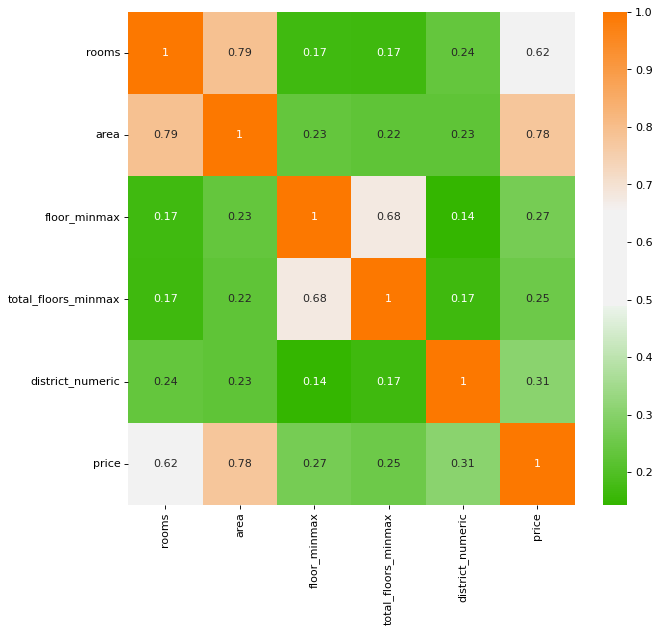

In [43]:
target = 'price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([X_train, df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

# Model Implementation

In [21]:
linear_reg = LinearRegression()

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X_train_scaled

array([[ 0.29024477, -0.23231839,  0.28365519, -0.71957118],
       [-0.45539408, -0.23231839, -0.81609616, -0.71957118],
       [-0.57966722,  0.01580258, -0.63280426, -0.71957118],
       ...,
       [-0.49681846,  2.74513319,  1.56669843,  0.32167545],
       [ 0.41451791, -0.72856032,  0.65023898,  1.36292208],
       [ 0.8701861 ,  0.76016547,  2.66644978,  0.84229876]])

In [73]:
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
import pandas as pd
import numpy as np

coefficients = np.append(linear_reg.intercept_, linear_reg.coef_)

# –§–æ—Ä–º–∏—Ä—É–µ–º –∏–Ω–¥–µ–∫—Å—ã –¥–ª—è DataFrame
indices = ['Intercept'] + [col + " Coef." for col in X.columns]

# –°–æ–∑–¥–∞–µ–º DataFrame
coef_df = pd.DataFrame(data=coefficients, index=indices, columns=['Value'])

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –∑–Ω–∞—á–µ–Ω–∏—è–º
coef_df_sorted = coef_df.sort_values('Value', ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(coef_df_sorted)


                                   Value
Intercept                  329570.075682
area Coef.                  76631.589564
district_numeric Coef.      40991.504194
total_floors_minmax Coef.   19921.584867
floor_minmax Coef.          13126.344506


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_pred = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 7795845317.522979


In [70]:
def model_evaluation(linear_reg, X_test, y_test, model_name):
    y_pred = linear_reg.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

Linear Reg.
MAE       6.511899e+04
MSE       7.795845e+09
RMSE      8.829408e+04
R2-Score  6.167347e-01

In [71]:
linear_reg.coef_

array([76631.58956408, 13126.34450552, 19921.58486725, 40991.50419437])

In [72]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10515366078.204435


In [75]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})

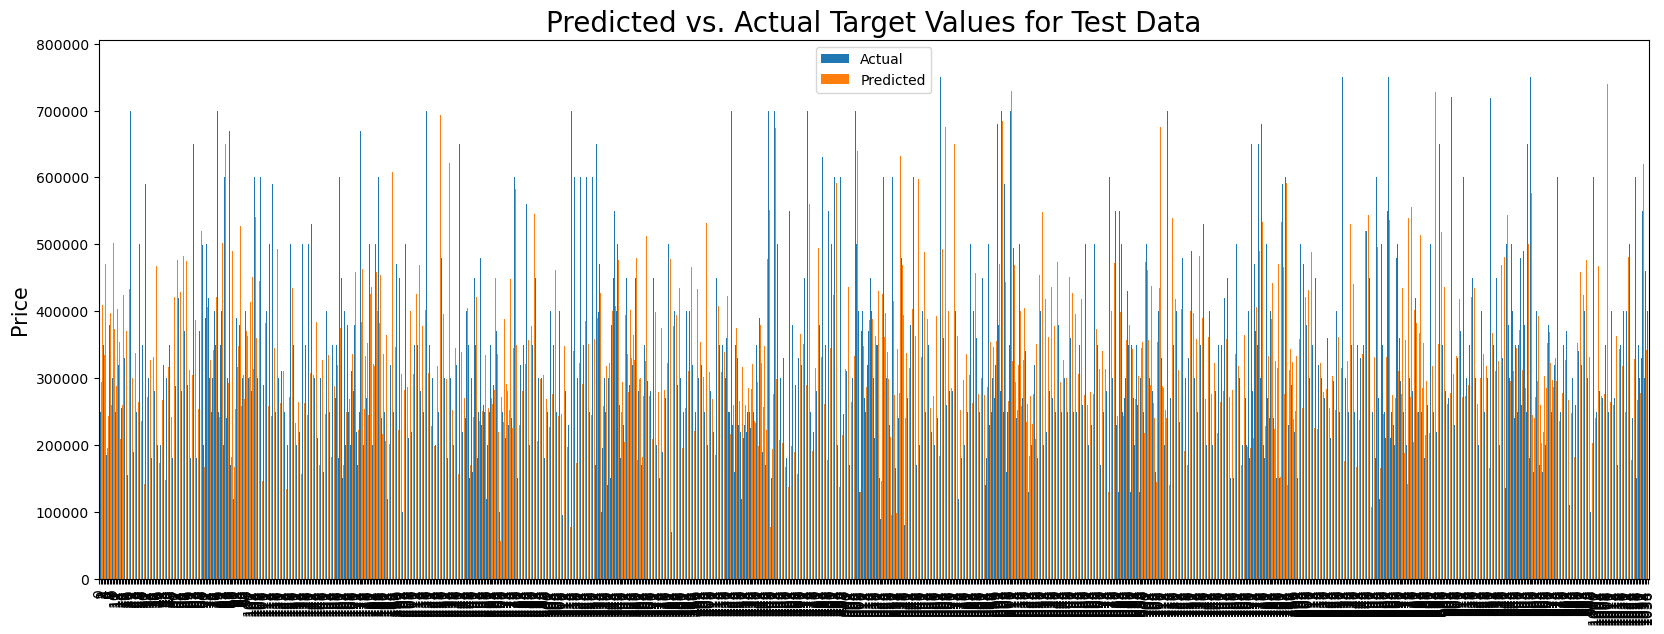

In [76]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Price', fontsize=15)
    plt.show()

compare_plot(df_comp)

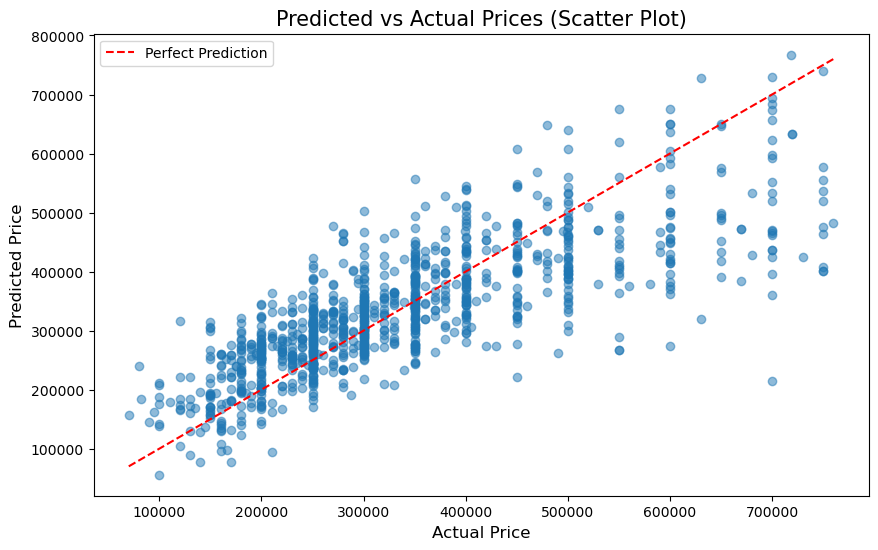

In [77]:
import matplotlib.pyplot as plt

def compare_plot_scatter(df_comp):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_comp['Actual'], df_comp['Predicted'], alpha=0.5)
    plt.plot([df_comp['Actual'].min(), df_comp['Actual'].max()],
             [df_comp['Actual'].min(), df_comp['Actual'].max()], 'r--', label='Perfect Prediction')
    plt.title('Predicted vs Actual Prices (Scatter Plot)', fontsize=15)
    plt.xlabel('Actual Price', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12)
    plt.legend()
    plt.show()

compare_plot_scatter(df_comp)


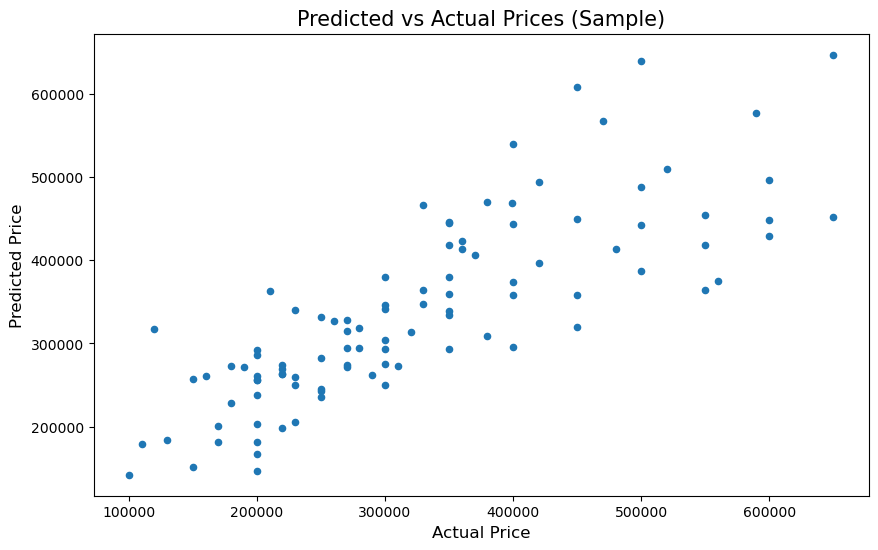

In [79]:
import random

def compare_plot_sample(df_comp):
    # –í—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—É—é –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    df_sample = df_comp.sample(n=100, random_state=42)
    df_sample.plot(x='Actual', y='Predicted', kind='scatter', figsize=(10, 6))
    plt.title('Predicted vs Actual Prices (Sample)', fontsize=15)
    plt.xlabel('Actual Price', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12)
    plt.show()

compare_plot_sample(df_comp)
